In [1]:
import numpy as np
import matplotlib.pyplot as plt
#supressing the scientific output
np.set_printoptions(suppress=True)

In [2]:
data = np.loadtxt("Final.txt",dtype=np.float64,delimiter=",")
data[:5,::] #dataset loaded demonstration

array([[     40.,    1312.,       4.,       2., 3411200.],
       [     38.,    1142.,       4.,       2., 2969200.],
       [     37.,    1880.,       3.,       3., 4606000.],
       [     34.,    3783.,       3.,       4., 9268350.],
       [     33.,    1405.,       4.,       2., 3653000.]])

In [3]:
X = data[::,0:4]
Y = data[::,-1:]

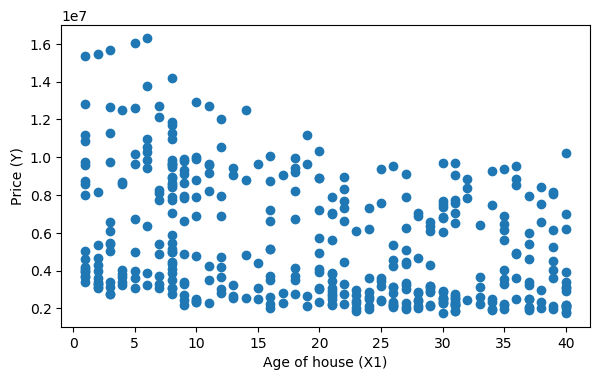

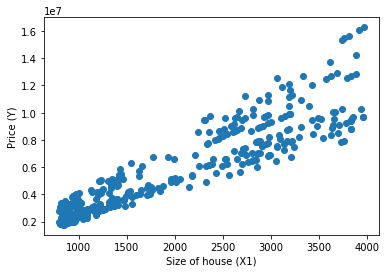

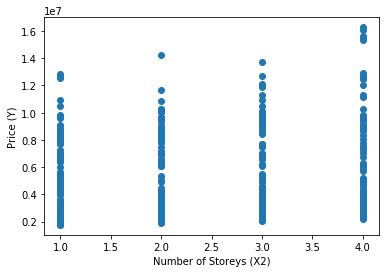

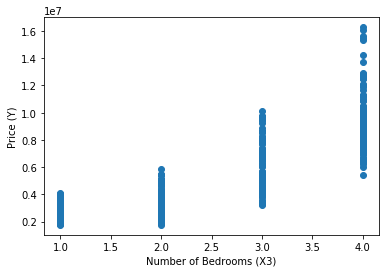

In [4]:
# Plotting example dataset
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(X[::,0:1],Y)
plt.xlabel("Age of house (X1)")
plt.ylabel("Price (Y)")
plt.show()
plt.scatter(X[::,1:2],Y)
plt.xlabel("Size of house (X1)")
plt.ylabel("Price (Y)")
plt.show()
plt.scatter(X[::,2:3],Y)
plt.xlabel("Number of Storeys (X2)")
plt.ylabel("Price (Y)")
plt.show()
plt.scatter(X[::,-1:],Y)
plt.xlabel("Number of Bedrooms (X3)")
plt.ylabel("Price (Y)")
plt.show()

In [5]:
# introduce weights of hypothesis (randomly initialize)
Theta = np.random.rand(1,5)
# m is total example set , n is number of features
m,n = X.shape
# add bias to input matrix by simple make X0 = 1 for all
X_bias = np.ones((m,n+1))
X_bias[::,1:] = X
# output first 5 X_bias examples
print ("X_bias = \n",X_bias[0:5,:])
print ("Y = \n",Y[0:5,::])

X_bias = 
 [[   1.   40. 1312.    4.    2.]
 [   1.   38. 1142.    4.    2.]
 [   1.   37. 1880.    3.    3.]
 [   1.   34. 3783.    3.    4.]
 [   1.   33. 1405.    4.    2.]]
Y = 
 [[3411200.]
 [2969200.]
 [4606000.]
 [9268350.]
 [3653000.]]


In [6]:
#feature scaling
# it also protect program from overflow error
mean_age = np.mean(X_bias[::,1:2])
mean_size = np.mean(X_bias[::,2:3])
mean_storey = np.mean(X_bias[::,3:4])
mean_bedroom = np.mean(X_bias[::,4:])
age_std = np.std(X_bias[::,1:2])
size_std = np.std(X_bias[::,2:3])
storey_std = np.std(X_bias[::,3:4])
bedroom_std = np.std(X_bias[::,4:])
X_bias[::,1:2] = (X_bias[::,1:2] - mean_age)/ (age_std)
X_bias[::,2:3] = (X_bias[::,2:3] - mean_size)/ (size_std) 
X_bias[::,3:4] = (X_bias[::,3:4] - mean_storey)/ (storey_std)
X_bias[::,4:] = (X_bias[::,4:] - mean_bedroom)/ (bedroom_std)
X_bias[0:5,::]

array([[ 1.        ,  1.69380964, -0.58093521,  1.33286347, -0.47481817],
       [ 1.        ,  1.52880139, -0.74941989,  1.33286347, -0.47481817],
       [ 1.        ,  1.44629727, -0.01799813,  0.4472399 ,  0.40447474],
       [ 1.        ,  1.1987849 ,  1.8680393 ,  0.4472399 ,  1.28376765],
       [ 1.        ,  1.11628078, -0.48876417,  1.33286347, -0.47481817]])

In [7]:
#define function to find cost
def cost(X_bias,Y,Theta):
    np.seterr(over='raise')
    m,n = X.shape
    hypothesis = X_bias.dot(Theta.transpose())
    return (1/(2.0*m))*((np.square(hypothesis-Y)).sum(axis=0))

In [8]:
#function gradient descent algorithm from minimizing theta
def gradientDescent(X_bias,Y,Theta,iterations,alpha):
    count = 1
    cost_log = np.array([])
    while(count <= iterations):
        hypothesis = X_bias.dot(Theta.transpose())
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,1:2])).sum(axis=0)
        temp2 = Theta[0,2] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,2:3])).sum(axis=0)
        temp3 = Theta[0,3] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,3:4])).sum(axis=0)
        temp4 = Theta[0,4] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,-1:])).sum(axis=0)
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        Theta[0,2] = temp2
        Theta[0,3] = temp3
        Theta[0,4] = temp4
        cost_log = np.append(cost_log,cost(X_bias,Y,Theta))
        count = count + 1
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Iteration vs Cost graph ")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost of Theta")
    plt.show()
    return Theta

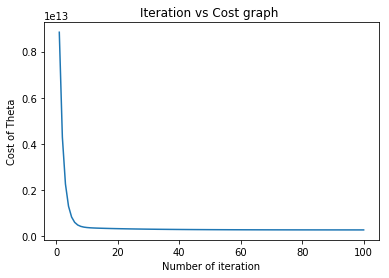

[[5513962.75       -898325.45526824 2710993.95770238  457196.76745143
   206721.55666829]]


In [9]:
alpha = 0.3
iterations = 100
Theta = gradientDescent(X_bias,Y,Theta,iterations,alpha)
print(Theta)

In [10]:
# predict the price
of a house with 3500 square feet ,1 Storey and 4 bedrooms with Age 10 Years Old
# add bias unit 1.0
X_predict = np.array([1.0,30,4000.0,2,2]) 
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_age)/ (age_std)
X_predict[2] = (X_predict[2] - mean_size)/ (size_std) 
X_predict[3] = (X_predict[3] - mean_storey)/ (storey_std)
X_predict[4] = (X_predict[4] - mean_bedroom)/ (bedroom_std)
hypothesis = X_predict.dot(Theta.transpose())
print("Cost of house with 4000 sq ft,2 Storey and 2 bedroom is with 30 years Old is",hypothesis)

Cost of house with 4000 sq ft,2 Storey and 2 bedroom is with 30 years Old is [10082228.41716152]


In [11]:
# predict the price of a house with 2000 square feet, 3 Storeyand,2 Bedrooms with Age 20 Years Old is
# add bias unit 1.0
X_predict = np.array([1.0,20,2000.0,3,2]) 
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_age)/ (age_std)
X_predict[2] = (X_predict[2] - mean_size)/ (size_std) 
X_predict[3] = (X_predict[3] - mean_storey)/ (storey_std)
X_predict[4] = (X_predict[4] - mean_bedroom)/ (bedroom_std)
hypothesis = X_predict.dot(Theta.transpose())
print("Cost of house with 2000 sq ft,3 Storey and 2 bedroom is with 20 years Old is",hypothesis)

Cost of house with 2000 sq ft,3 Storey and 2 bedroom is with 20 years Old is [5854629.68335659]


In [15]:
# predict the price of a house with 3500 square feet, 1 Storey,4 Bedrooms with Age 10 Years Old is
# add bias unit 1.0
X_predict = np.array([1.0,6,1000.0,4,2]) 
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_age)/ (age_std)
X_predict[2] = (X_predict[2] - mean_size)/ (size_std) 
X_predict[3] = (X_predict[3] - mean_storey)/ (storey_std)
X_predict[4] = (X_predict[4] - mean_bedroom)/ (bedroom_std)
hypothesis = X_predict.dot(Theta.transpose())
print("Cost of house with 3500 sq ft,1 Storey and 4 bedroom is with 10 years Old is",hypothesis)

Cost of house with 3500 sq ft,1 Storey and 4 bedroom is with 10 years Old is [4610322.41545849]
